# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [8]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16,8]


# import pandas as pd
# import numpy as np
# from sklearn import metrics
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline  
# from sklearn.model_selection import train_test_split
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.metrics import confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks 
# from sklearn.utils import resample
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV



In [16]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_row', 300)

## 1. Data Cleaning

In [3]:
df = pd.read_csv('classification_lab_data.csv')

In [17]:
df.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         2   49      0      0      0      0   
1      30000    1          2         1   39      0      0      0      0   
2     260000    1          1         2   27      0      0      0      0   
3     200000    2          2         1   33      0      0      0      0   
4      50000    1          1         2   27      0      0      0      0   
5     150000    2          1         1   46      0      0      0      0   
6     400000    2          2         2   41     -2     -2     -2     -2   
7     360000    2          2         2   31      0     -1     -1     -1   
8     160000    2          2         2   32      2      2      2      2   
9     500000    2          1         1   44      0     -1     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      0      0      90231      90647      92309      93880      99418   
1      0      0      20893      22206      19273      16469      14670   
2      0      0     158711     129796     101721      76699      56738   
3      0      0      23762      25944      26988      25237      22131   
4      0      0      14614      15622      16342      17653      17697   
5      0      0      21787      22817      24134      24635      29032   
6     -2     -2      43672        678        330        330        330   
7     -2     -2       3386       5964       1340       1650       4350   
8     -1      0        400        400        400          0      20818   
9      0      0     329570      71921     367979     294969     189612   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     101392      2852      2784      2603     10000      3164      2868   
1      11214      2007      2000      2000       417      1500      1500   
2      39134     30000      4132      3410      2600      1800      1200   
3      13774      4000      2000       600      3000      4000       100   
4      18068      1558      1278      1589       633       656       783   
5      29766      1382      1699      1200      5000      1214      1500   
6        330       678       330       330       330       330       330   
7       4792      5964      1340      1650      4350      4792     40682   
8      20818         0         0         0     20818         0         0   
9     128459     72001    368199      6486       234        90    167116   

   default payment next month  
0                           1  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           1  
7                           0  
8                           0  
9                           0

## 2. EDA

1. Credit limit may be relevant to whether or not the cardholder is a business.
2. Pattern in payments?
3. Average salary in Taiwan in 2005 was 659,858.54 per person per govt tables. Get the average salary by education 4. 4. level (for example) and find the percentage of debt to salary.
5. How is this calculated in the US?
6. Percent debt change from month to month?
7. Are they over their limit or not? (boolean feature)

In [5]:
print('full data:', df.shape)

full data: (23999, 24)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6                     23999 non-null int64
PAY_AMT1                

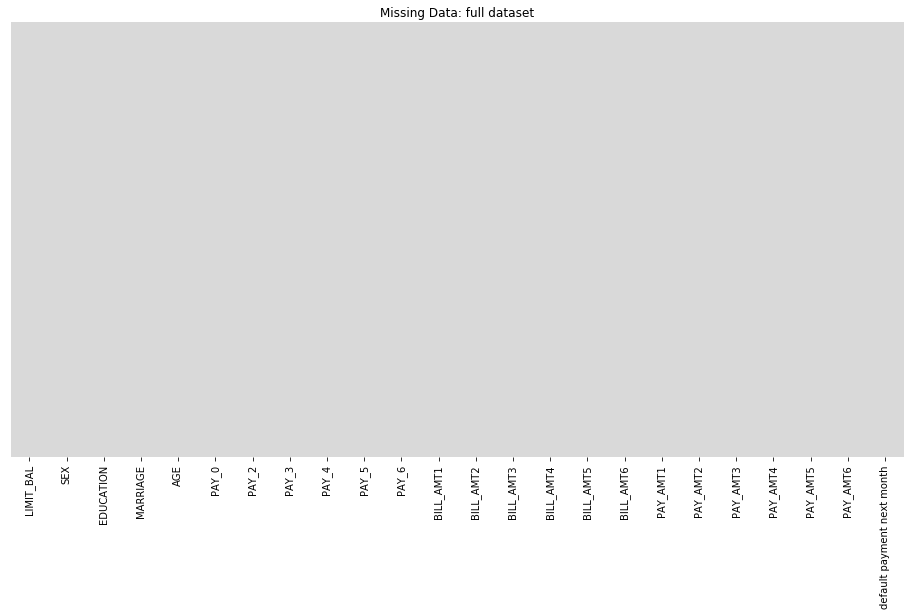

In [9]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: full dataset')
plt.show()

> The data is clean, all values are numerical, let's make sure what these numbers represent is always valid

default payment next month
0    18691
1     5308
Name: default payment next month, dtype: int64


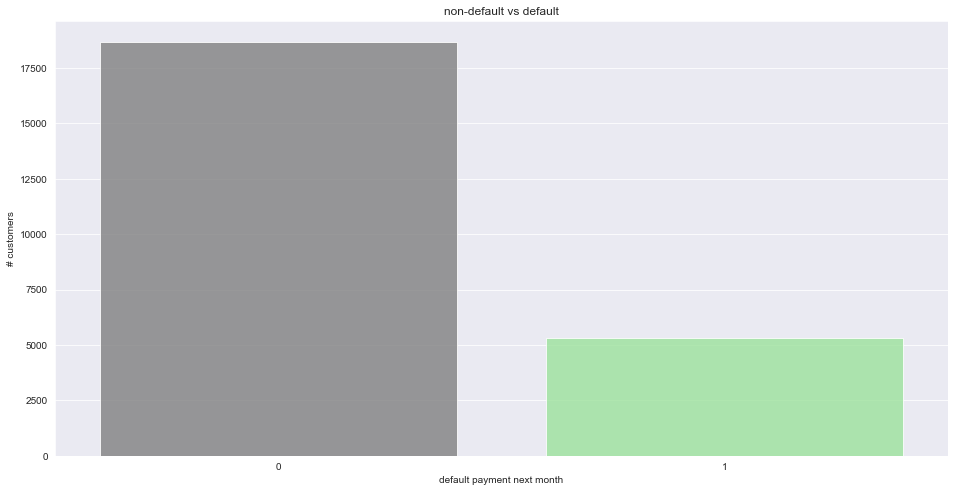

In [13]:
target = df['default payment next month']
print(df.groupby(['default payment next month'])['default payment next month'].count())

# Target Variable Countplot
sns.set_style('darkgrid')
sns.countplot(target, alpha =.80, palette= ['grey','lightgreen'])
plt.title('non-default vs default')
plt.ylabel('# customers')
plt.show()

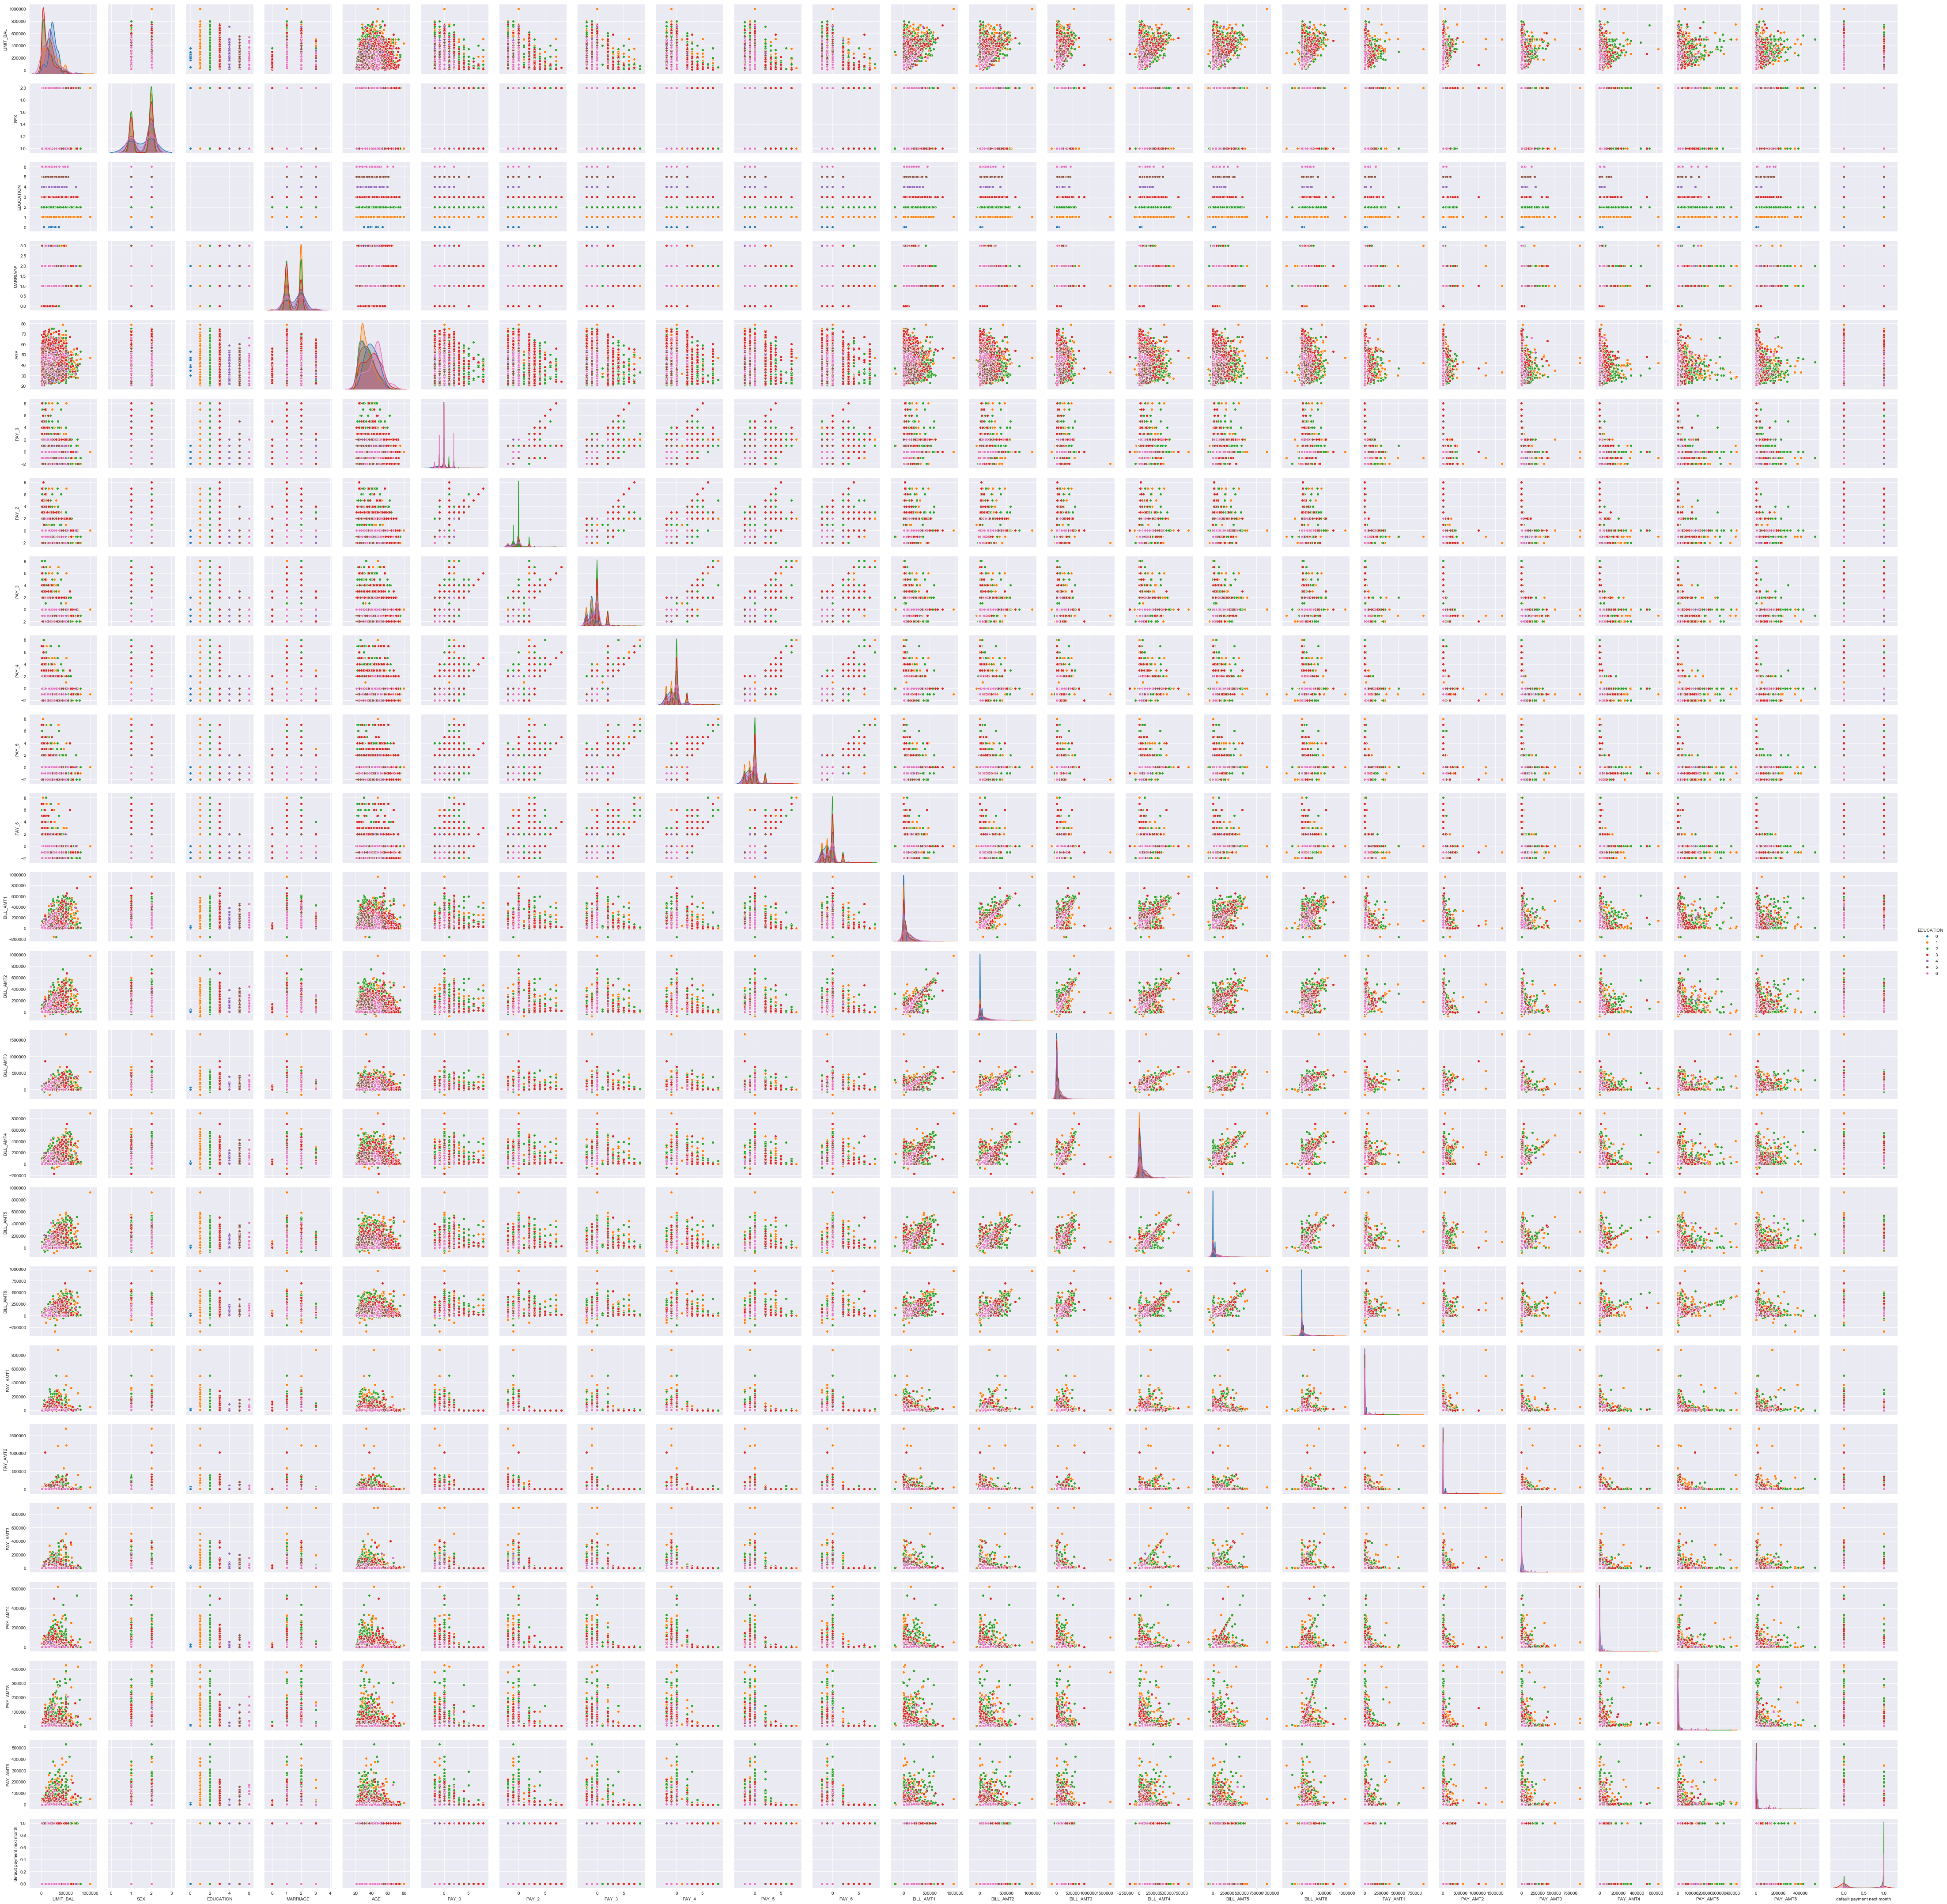

In [15]:
sns.pairplot(df, hue = 'EDUCATION')


## 3. Feature Engineering

In [ ]:
# median income by ed level (column)

# 1 - (median income / bill amount)   *    6 montly bills to get income to debt ration (%)



In [18]:
# possibly dummy eduction and marriage columns so that Model does not treat them as linear  (drop original education & marriage columns)


In [ ]:
# interaction [Age * Education]

In [ ]:
# interaction [marrital status * credit limit]

In [ ]:
# interaction [marrital status * sex]

In [ ]:
# 1 - (next bill / prev bill) = % change of bill btw months   *    6 columns

In [ ]:
# base polynomial dataset (all features)

In [ ]:
# refined polynomia dataset (engineered + selected + interactions)

## 4. Feature Selection

In [ ]:
# balance by resampling

In [ ]:
# scale features ()

## 4.1 Resampling

### Data Preping For Resampling, Separate Majority & Minority Classes

In [ ]:
# prep data for resampling, this returns the Majority & Minority classes in seperate Pandas Series Objects

def resamplingDataPrep(X_train, y_train, target_var): # ! should be be call upSamplingDataPrep?
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var]= y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class
    
    
# call function as:
# resamplingDataPrep(X_train, y_train, 'DEFAULT') # remember to change target column name to 'DEFAULT'!

### Up-Sample Minority

In [ ]:
# up-sample Minority Class manually
def upSampleMinority(target_var, minority_class, majority_class):  # ! double check params needed
    # upsample minority
    minority_upsampled = resample(minority_class,
                          replace=True, # sample with replacement
                          n_samples=len(majority_class), # match number in majority class
                          random_state=23) # reproducible results
    # combine majority and upsampled minority
    upsampled = pd.concat([majority_class, minority_upsampled])
    # check new class counts
    print(upsampled[target_var].value_counts())
    # return new upsampled X_train, y_train
    X_train_upsampled = upsampled.drop(target_var, axis=1)
    y_train_upsampled = upsampled[target_var]
    return X_train_upsampled, y_train_upsampled

# call function as:
# upSampleMinority('DEFAULT', minority_class, majority_class) # remember to change target column name to 'DEFAULT'! 

In [ ]:
# up-sample Minority Class with SMOTE()
def upSampleMinoritySMOTE(X_train, y_train)
    sm = SMOTE(random_state=23, ratio=1.0)
    X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
    print(X_train_sm.count(), len(y_train_sm)
    return X_train_sm, y_train_sm
    
    

### Down-Sample Majority

In [ ]:
# down-sample Majority Class manually
def downSampleMajority(target_var, minority_class, majority_class):
    # downsample majority
    majority_downsampled = resample(majority_class,
                                    replace = False, # sample without replacement
                                    n_samples = len(defaulted), # match minority n
                                    random_state = 23) # reproducible results
    # combine majority and upsampled minority
    downsampled = pd.concat([majority_downsampled, minority_class])
    # check new class counts
    print(downsampled[target_var].value_counts())
    # return new downsampled X_train, y_train
    X_train_downsampled = downsampled.drop(target_var, axis=1)
    y_train_downsampled = downsampled[target_var]
    return X_train_downsampled, y_train_downsampled


# call function as:
# downSampleMajority('DEFAULT', minority_class, majority_class) # remember to change target column name to 'DEFAULT'! 

In [ ]:
# down-sample with TomekLinks()
def downSampleMajorityTomekLinks(X_train, y_train):
    tl = TomekLinks()
    X_train_tl, y_train_tl = tl.fit_sample(X_train, y_train)
    print(X_train_tl.count(), len(y_train_tl))
    return X_train_tl, y_train_tl

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

### K-Nearest Neighbors

In [ ]:
def knnTrainTest(k_number, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k_number)
    # train
    knn.fit(X_train, y_train)
    # test
    y_pred_class = knn.predict(X_test)


    # check Accuracy
    print('Test Accuracy score: ', accuracy_score(y_test, y_pred_class))
    # check F1 score
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    return y_pred_class
    

In [ ]:
# filter feature selection for KNN

### Logistic Regression

In [ ]:
# helper function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    

def logiRegr(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    # examine coefficients
    print(zip(X_train.columns, logreg.coef_[0]))
    print(logreg.coef_)
    # class predictions (not predicted probabilities)
    y_pred_class = logreg.predict(X_test)
    print('Classification Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    # plot confusion matrix
    cm = confusion_matrix(y_test,y_pred_class)
    classes = ['DEFAULT', 'NON-default']
    plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Decision Tree

## 6. Model Evaluation

## 7. Final Model